In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from konlpy.tag import Okt         ; t = Okt()     # 구 트위터
from konlpy.tag import *

import nltk
import pickle

In [2]:
df_with = pd.read_csv('./mini/EDA_headlines.tsv', sep="\t")
df_with.shape, 

((63731, 3),)

In [3]:
# Unique value

df_with['주가변동'].nunique()

2

In [4]:
# Unique value
df_with['뉴스제목'].nunique(), df_with['주가변동'].nunique()

(63731, 2)

In [6]:
# Remove Duplicates
df_with.drop_duplicates(subset=['뉴스제목'], inplace=True) #reviews열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 : ',len(df_with))

총 샘플의 수 :  63731


In [7]:
# NULL값 유무
print(df_with.isnull().values.any())


False


In [8]:
# Remove Null rows
df_with = df_with.dropna(how='any',axis=0)
print(df_with.isnull().values.any())

False


In [9]:
# after removing Null and Duplicates

df_with.shape

(63731, 3)

In [10]:
with_len = df_with['뉴스제목'].astype(str).apply(len)
# print(without_len.head())
print("Max Length: ", with_len.max())
print("Min Length: ", with_len.min())



Max Length:  48
Min Length:  8


In [11]:
df_with['str_len']= df_with['뉴스제목'].str.len()


git test delete later

In [13]:
df_with.loc[(df_with['str_len'] < 10)]


,뉴스제목,주가변동,str_len
1447,[인사] SK그룹,0,9
2320,[인사] 한국전력,0,9
3153,[인사] LG전자,1,9
3856,[인사]삼성SDI,0,9
4942,[인사]삼성화재,0,8
5334,[인사] 삼성생명,1,9
5483,[인사] 삼성화재,0,9
5995,[인사] 삼성전기,0,9
6503,[인사]LG화학,0,8
14781,[인사]한국전력,1,8


In [14]:
df_with['뉴스제목'].head()

0             [클릭 e종목]"KB금융, 우수한 펀더멘털 입증...목표가 10% ↑"
1                    LG전자 "MZ세대 응원"…'라이프 이즈 굿' 캠페인 진행
2                             신한금융지주, 제20기 정기 주주총회 개최
3    [마켓인사이트]공유오피스 스파크플러스, SK텔레콤·미래에셋으로부터 전략적 투자 유...
4                [Hot-Line] “SK텔레콤, 나녹스 투자 우려 과도한 상황"
Name: 뉴스제목, dtype: object

최단:  8
최장:  48
평균:  31
(48,)


Text(0.5, 1.0, 'Sentence Length Distribution (Without)')

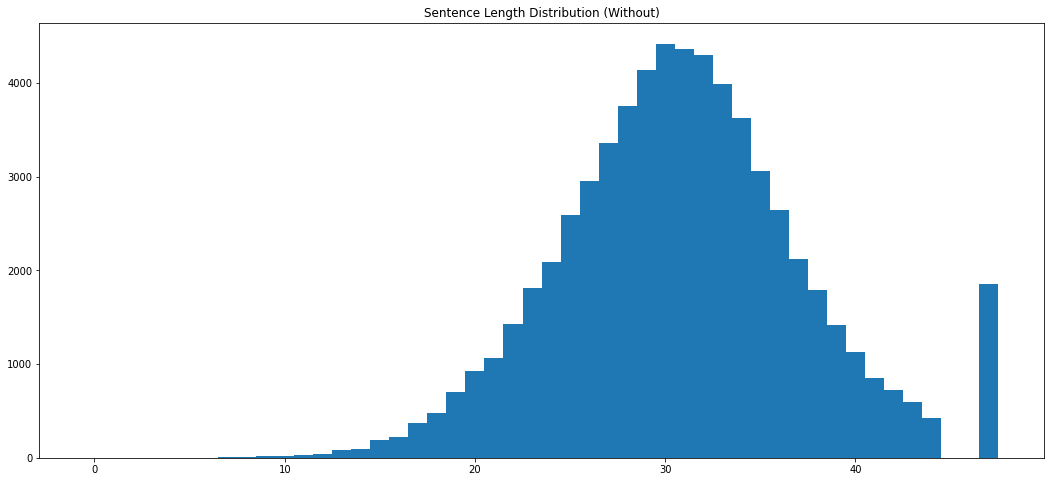

In [15]:
min_len = 999
max_len = 0
sum_len = 0

raw = df_with['뉴스제목'].tolist()

for sen in raw:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print("최단: ", min_len)
print("최장: ", max_len)
print("평균: ", sum_len//len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
  sentence_length[len(sen)-1] += 1

print(sentence_length.shape)

f, ax = plt.subplots(figsize=(18,8))

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution (Without)")

In [16]:

with_head = [x for x in df_with['뉴스제목'] if type(x) is str]

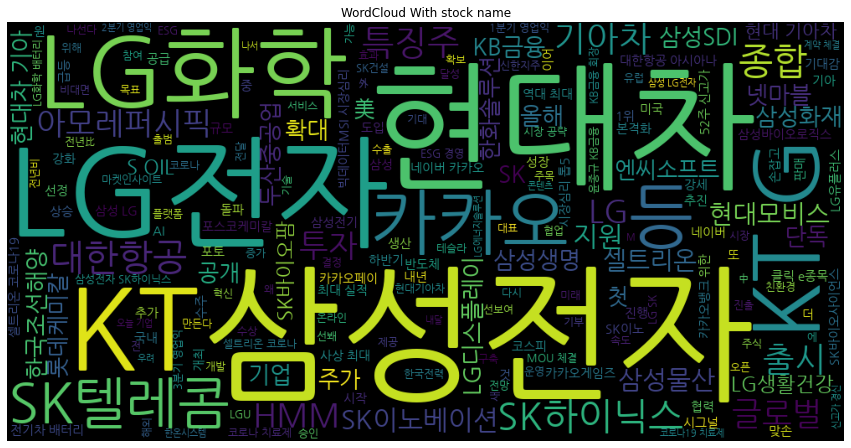

In [17]:
wordcloud = WordCloud(font_path='./fonts/NanumGothic.ttf', width=1000, height=500).generate(' '.join(with_head))
plt.figure(figsize=(15,10))
plt.title("WordCloud With stock name")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Now really want to see what I can do with the data.

<AxesSubplot:>

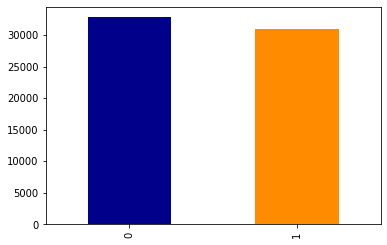

In [18]:
df_with['주가변동'].value_counts().plot.bar(color=['darkblue','darkorange'])

In [19]:
# df_without = pd.read_csv('./without_name/all_headlines_without_names.tsv', sep="\t")

df_with.to_csv('./mini/EDA_headlines_no_scale.tsv', index=False, encoding='utf-8', sep="\t")


In [20]:
df_with.head()

,뉴스제목,주가변동,str_len
0,"[클릭 e종목]""KB금융, 우수한 펀더멘털 입증...목표가 10% ↑""",1,39
1,"LG전자 ""MZ세대 응원""…'라이프 이즈 굿' 캠페인 진행",1,32
2,"신한금융지주, 제20기 정기 주주총회 개최",1,23
3,"[마켓인사이트]공유오피스 스파크플러스, SK텔레콤·미래에셋으로부터 전략적 투자 유...",1,48
4,"[Hot-Line] “SK텔레콤, 나녹스 투자 우려 과도한 상황""",1,36


In [27]:
df_with['뉴스제목'] = df_with['뉴스제목'].str.replace('\s+', ' ', regex=True)
df_with['뉴스제목'] = df_with['뉴스제목'].map(lambda x: re.sub('[0-9,.!·,…*>@#%&$<_?.:\“\/\”\’\'\"\^\\‘\|\`\(\)\[\]\{\}]', '', x))
df_with['뉴스제목'] = df_with['뉴스제목'].map(lambda x: re.sub('\u200c', '', x))
df_with['뉴스제목'] = df_with['뉴스제목'].map(lambda x: re.sub('[-–ㆍ]', ' ', x))

In [28]:
df_with.sample(30)

,뉴스제목,주가변동,str_len
373,SKB 기업전화전국대표번호 등 SK텔링크 BB사업 인수,0,33
40745,KT GiGA Wi로 집 어디서든 빠르게 접속,1,28
9981,포토발표하는 김종승 SK텔레콤 리더,0,21
3954,KT LH 해외산업단지 IDC 구축디지털 전환 지원,1,30
48380,여름철 골치 에어컨냄새 잡았다현대차 퀄리티 에어 기술 개발,0,36
39983,베일 가려진 지분율 삼성생명 상속분 일부 시장에 나오나,0,32
51245,카카오게임즈 일본 위 게임 우마무스메 프리티 더비 국내 서비스,1,38
46302,현대기아차 RD 테크데이 개최협력사와 동반성장,1,37
623,사상최대 실적 LG전자 가전 글로벌 위 놓고 월풀과 승 패,1,38
61848,현장에서사람 없는 해운산업 정책허탈한 HMM 선원들,1,36


In [29]:
df_with['str_len']= df_with['뉴스제목'].str.len()
df_with.loc[(df_with['str_len'] < 10)]

,뉴스제목,주가변동,str_len
658,인사신한금융지주,1,8
984,인사 한국전력공사,1,9
1447,인사 SK그룹,0,7
2320,인사 한국전력,0,7
2590,인사삼성전기 임원,0,9
3153,인사 LG전자,1,7
3856,인사삼성SDI,0,7
4464,인사KB금융지주,0,8
4942,인사삼성화재,0,6
5334,인사 삼성생명,1,7


In [30]:
df_with['okt'] = df_with.apply(lambda row: t.morphs(row['뉴스제목']), axis=1)

df_with.head()

,뉴스제목,주가변동,str_len,okt
0,클릭 e종목KB금융 우수한 펀더멘털 입증목표가 ↑,1,28,"[클릭, e, 종목, KB, 금융, 우수한, 펀더, 멘털, 입증, 목표, 가, ↑]"
1,LG전자 MZ세대 응원라이프 이즈 굿 캠페인 진행,1,27,"[LG, 전자, MZ, 세대, 응원, 라이프, 이즈, 굿, 캠페인, 진행]"
2,신한금융지주 제기 정기 주주총회 개최,1,20,"[신, 한, 금융, 지주, 제기, 정기, 주주총회, 개최]"
3,마켓인사이트공유오피스 스파크플러스 SK텔레콤미래에셋으로부터 전략적 투자 유,1,41,"[마켓, 인사이트, 공유, 오피스, 스파크, 플러스, SK, 텔레콤, 미래에셋, 으..."
4,Hot Line SK텔레콤 나녹스 투자 우려 과도한 상황,1,31,"[Hot, Line, SK, 텔레콤, 나, 녹스, 투자, 우려, 과도, 한, 상황]"


In [31]:
with_up = df_with[df_with['주가변동'] == 1]
with_down = df_with[df_with['주가변동'] == 0]

In [32]:
tokens_up = with_up.뉴스제목.values.tolist()
title_text = ''
for each_line in tokens_up:
    title_text = title_text + each_line + '\n'

tokens_up = t.morphs(title_text)
up = nltk.Text(tokens_up)
print("토큰 전체 개수: ", len(up.tokens))          # 토큰 전체 개수
print("토큰 unique 개수: ", len(set(up.tokens)))     # 토큰 unique 개수

토큰 전체 개수:  355047
토큰 unique 개수:  16648


In [33]:
tokens_down = with_down.뉴스제목.values.tolist()
title_text = ''
for each_line in tokens_down:
    title_text = title_text + each_line + '\n'

tokens_down = t.morphs(title_text)
down = nltk.Text(tokens_down)
print("토큰 전체 개수: ", len(down.tokens))          # 토큰 전체 개수
print("토큰 unique 개수: ", len(set(down.tokens)))     # 토큰 unique 개수

토큰 전체 개수:  378273
토큰 unique 개수:  17006


In [34]:
def returnNotMatches(a, b):
    return [[x for x in a if x not in b], [x for x in b if x not in a]]

up_only, down_only = returnNotMatches(tokens_up, tokens_down)
len(up_only), len(down_only)

(10794, 11542)

In [36]:
# Save pickle
with open('./mini/with_len_okt.pkl', 'wb') as f:
    pickle.dump(df_with, f)
with open('./mini/with_up_only.pkl', 'wb') as f:
    pickle.dump(up_only, f)
with open('./mini/with_down_only.pkl', 'wb') as f:
    pickle.dump(down_only, f)

In [37]:
# Load pickle
with open('./mini/with_len_okt.pkl', 'rb') as f:
    df_with = pickle.load(f)
with open('./mini/with_up_only.pkl', 'rb') as f:
    up_only = pickle.load(f)
with open('./mini/with_down_only.pkl', 'rb') as f:
    down_only = pickle.load(f)

In [44]:
stop_words = ['\u200c','\n ','\n',"'",'…',',','[',']','(',')','"','주','에','·','장','-','적',\
              '도','‘','`','가','’','의','이','★','은','“','대','”','한','B','로','킷','얀',\
              '?','선','A','는','!','"…','상','들','제','…"','일','서','명',"'…",'기','뮨',\
              '···','소','등','자','전','률','미','...','세','시','안','폭',"…'",'만','억',\
              '눈','더','량','고','인','성','다','감','을','지','수','것','째','겸','깅','참',\
              '기','···','중','계','왜','총','내','과','젠','또','연','엔','차','할','힌',\
              '새','사','때','..','임','속','’…','G','나','개','원','글','빵','훈','졸',\
             '달','→','권','?…','간','배','K','저','와','하','/','조','두','분','형','넥',\
             '황','공','&','보','문','익','X','억원',']"','치','산','를','오','해','S','그','된','준','▶',\
             '건','재','반','라','년','초','분','월','신','p','급','줄','경','구','진','올','발','vs','강',\
             '국','난','판','면','"(','`…','살','아','번','텍','팜','Q','메','점','월',\
             'D','비','됐다','채',"]'",'보니','손','확','종','동','팔','타','~','땐','말','요',\
             "',",'스','…`','단','길','회','호','용','듯','최','가','한','e','나']

up_only = [each_word for each_word in up_only if each_word not in stop_words]
up = nltk.Text(up_only)

print(up.vocab().most_common(200))

down_only = [each_word for each_word in down_only if each_word not in stop_words]
down = nltk.Text(down_only)

print(down.vocab().most_common(200))

[('국세청', 33), ('세무조사', 30), ('휠체어', 20), ('광물', 19), ('EY', 19), ('중부', 18), ('선풍기', 18), ('핵연료', 18), ('출국', 18), ('매립', 17), ('채굴', 17), ('빌스', 16), ('가습기', 16), ('살균제', 16), ('IFC', 16), ('아태', 16), ('그리스', 15), ('시마론', 14), ('고압', 14), ('가압', 14), ('헤파', 14), ('거장', 14), ('에너지스타', 14), ('EOA', 14), ('유소연', 14), ('흑연', 14), ('재개발', 13), ('사관', 13), ('라텍스', 13), ('로밍', 13), ('APEX', 13), ('마몽드', 13), ('그랜버드', 13), ('여자오픈', 13), ('이스라엘', 13), ('삼다수', 13), ('함부르크', 13), ('수박', 12), ('VG', 12), ('송파대로', 12), ('페시', 12), ('동화책', 12), ('빼빼로데이', 11), ('하이킹', 11), ('얼음', 11), ('라이스', 11), ('장민호', 11), ('정동원', 11), ('요양원', 11), ('SPA', 11), ('HBME', 11), ('헤리티지', 11), ('테헤란로', 11), ('디밀에', 11), ('장녀', 11), ('빌리지', 11), ('라포', 11), ('백종원', 11), ('ARS', 11), ('호두까기', 11), ('작업복', 11), ('건강검진', 11), ('농민', 11), ('계사', 11), ('미터', 11), ('성민석', 11), ('노원', 10), ('웰컴', 10), ('OCIO', 10), ('HIV', 10), ('리무진', 10), ('계량', 10), ('MCN', 10), ('단자', 10), ('이혼', 10), ('알렌', 10), ('레종', 10), ('보이스피싱', 10

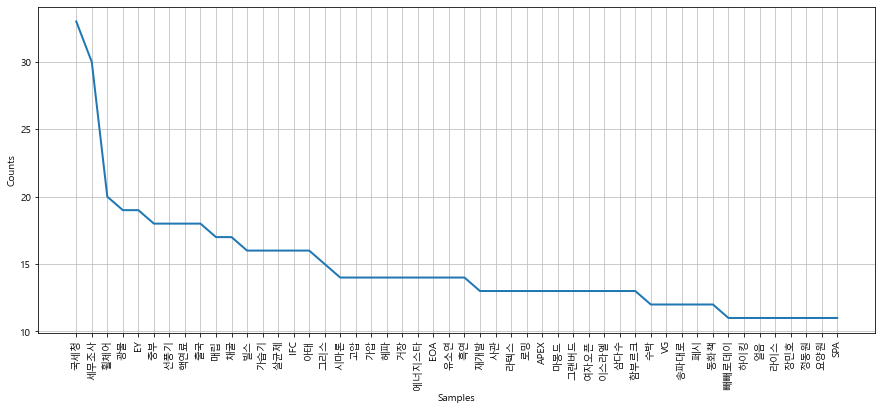

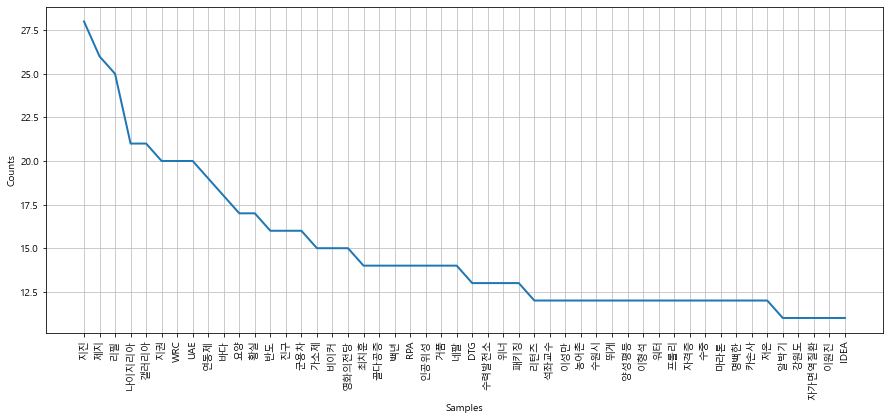

In [45]:
# 그래프에서 한글 폰트가 깨질 경우 실행
up = nltk.Text(up_only)
down = nltk.Text(down_only)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.figure(figsize=(15,6))
up.plot(50)
plt.figure(figsize=(15,6))
down.plot(50)
plt.show()

In [46]:
print("토큰 전체 개수: ", len(up.tokens))          # 토큰 전체 개수
print("토큰 unique 개수: ", len(set(up.tokens)))   
print("토큰 전체 개수: ", len(down.tokens))          # 토큰 전체 개수
print("토큰 unique 개수: ", len(set(down.tokens)))   

토큰 전체 개수:  10725
토큰 unique 개수:  6129
토큰 전체 개수:  11475
토큰 unique 개수:  6486


In [47]:
df_with.head()

,뉴스제목,주가변동,str_len,okt
0,클릭 e종목KB금융 우수한 펀더멘털 입증목표가 ↑,1,28,"[클릭, e, 종목, KB, 금융, 우수한, 펀더, 멘털, 입증, 목표, 가, ↑]"
1,LG전자 MZ세대 응원라이프 이즈 굿 캠페인 진행,1,27,"[LG, 전자, MZ, 세대, 응원, 라이프, 이즈, 굿, 캠페인, 진행]"
2,신한금융지주 제기 정기 주주총회 개최,1,20,"[신, 한, 금융, 지주, 제기, 정기, 주주총회, 개최]"
3,마켓인사이트공유오피스 스파크플러스 SK텔레콤미래에셋으로부터 전략적 투자 유,1,41,"[마켓, 인사이트, 공유, 오피스, 스파크, 플러스, SK, 텔레콤, 미래에셋, 으..."
4,Hot Line SK텔레콤 나녹스 투자 우려 과도한 상황,1,31,"[Hot, Line, SK, 텔레콤, 나, 녹스, 투자, 우려, 과도, 한, 상황]"


In [ ]:
temp_down = down.vocab().most_common()
temp_up = up.vocab().most_common()
print(down.vocab().most_common(3))

[('참기름', 49), ('바레인', 33), ('김대철', 30)]


<BarContainer object of 60 artists>

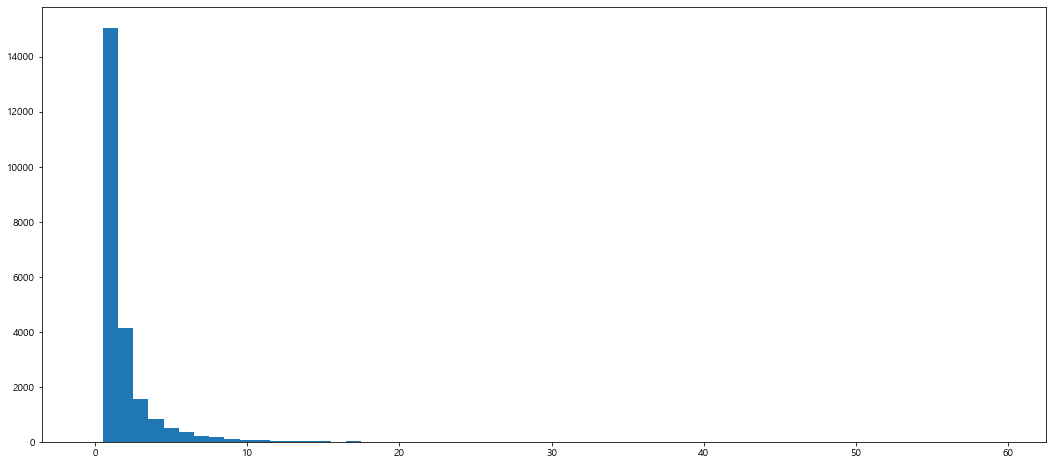

In [ ]:
down_words_c = np.zeros((60), dtype=np.int)

for sen in [item[1] for item in temp_down]:
  down_words_c[int(sen)] += 1

f, ax = plt.subplots(figsize=(18,8))
plt.bar(range(60), down_words_c, width=1.0)

<BarContainer object of 60 artists>

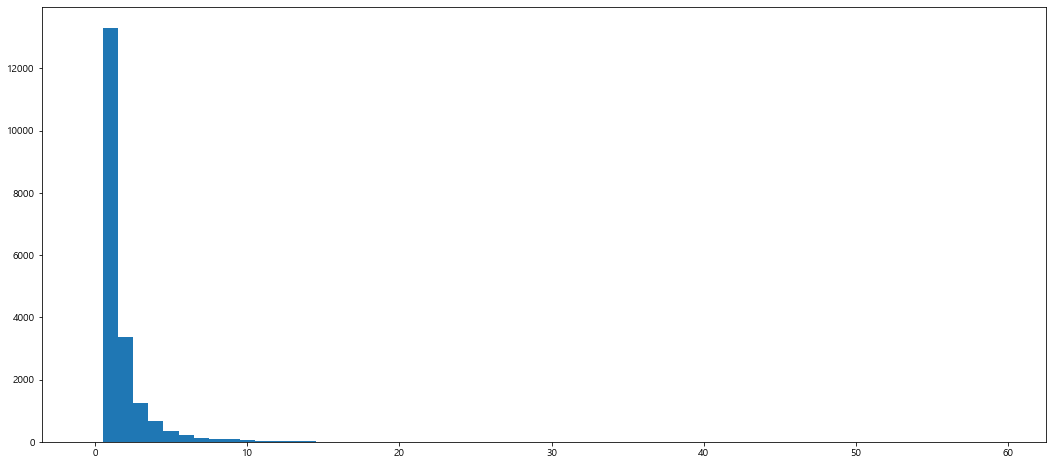

In [ ]:
up_words_c = np.zeros((60), dtype=np.int)

for sen in [item[1] for item in temp_up]:
  up_words_c[int(sen)] += 1

f, ax = plt.subplots(figsize=(18,8))
plt.bar(range(60), up_words_c, width=1.0)

In [ ]:
print("up words which appeared only 1: ", up_words_c[1])
print("down words which appeared only 1: ", down_words_c[1])

up words which appeared only 1:  13309
down words which appeared only 1:  15057


In [41]:
range(44)

range(0, 44)

In [ ]:
for sen in df_with['okt'][0:100]:
    # print(i)
    for i in sen:
        for c in up_only:
            if i == c:
                print(c)
